In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
%config lnlineBackend.figure_format = 'retina' #선명하게 만들기

## 따릉이 데이터(SeoulBikeData)

- date : 대여 날짜
- Rented Bike Count : 대여된 자전거 수
- Hour : 대여시간
- Temperature : 기온
- Humidity(%) : 습도
- Wind speed (m/s) : 풍속
- Visibility (10m) : 기상 상태에 따른 가시성
- Dew point temperature : 이슬점 온도 _ 습도,온도 파생변수
- Solar Radiation (MJ/m2) : 태양 복사량
- Rainfall(mm) : 강우량(비)
- Snowfall (cm) : 적설량(눈)
- Seasons : 계절
- Holiday : 휴일여부 (Holiday / No Holiday)
- Functioning Day : 대여소 운영여부 (Yes / No) : yes/no 구분 : 왜 운영을 안하는지 생각

In [5]:
df = pd.read_csv('C:/Users/jisoo sung/OneDrive/바탕 화면/비어플/SeoulBikeData_NaN.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8760 non-null   int64  
 1   Date                       8760 non-null   object 
 2   Rented Bike Count          8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Temperature(°C)            7884 non-null   float64
 5   Humidity(%)                8760 non-null   int64  
 6   Wind speed (m/s)           7884 non-null   float64
 7   Visibility (10m)           8760 non-null   int64  
 8   Dew point temperature(°C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)    8760 non-null   float64
 10  Rainfall(mm)               8760 non-null   float64
 11  Snowfall (cm)              8760 non-null   float64
 12  Seasons                    7884 non-null   object 
 13  Holiday                    8760 non-null   objec

In [7]:
df.corr()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Unnamed: 0,1.000000,0.341894,0.002737,0.575198,0.169402,-0.159671,0.107773,0.562896,0.091449,0.038022,-0.137047
Rented Bike Count,0.341894,1.000000,0.410257,0.537229,-0.199780,0.116558,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.002737,0.410257,1.000000,0.116151,-0.241644,0.284573,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.575198,0.537229,0.116151,1.000000,0.156094,-0.034464,0.039581,0.912099,0.356539,0.050215,-0.221321
Humidity(%),0.169402,-0.199780,-0.241644,0.156094,1.000000,-0.336105,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),-0.159671,0.116558,0.284573,-0.034464,-0.336105,1.000000,0.170671,-0.178011,0.331239,-0.019080,-0.001319
Visibility (10m),0.107773,0.199280,0.098753,0.039581,-0.543090,0.170671,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.562896,0.379788,0.003054,0.912099,0.536894,-0.178011,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.091449,0.261837,0.145131,0.356539,-0.461919,0.331239,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),0.038022,-0.123074,0.008715,0.050215,0.236397,-0.019080,-0.167629,0.125597,-0.074290,1.000000,0.008500


In [8]:
df

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
# 데이터를 날짜와 시간대로 정렬
df.sort_values(by=['Date', 'Hour'], inplace=True)

In [10]:
# 'Time' 변수 생성 _ 시간대
df['Time'] = ''
df.loc[(df['Hour'] >=0) & (df['Hour'] < 6), 'Time'] = '새벽'
df.loc[(df['Hour'] >=6) & (df['Hour'] < 12), 'Time'] = '아침'
df.loc[(df['Hour'] >=12) & (df['Hour'] < 18), 'Time'] = '낮'
df.loc[(df['Hour'] >=18) , 'Time'] = '밤'

<AxesSubplot:>

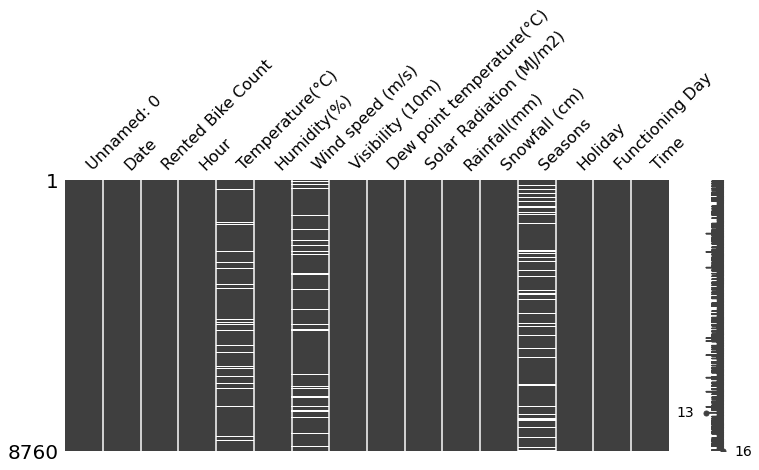

In [11]:
msno.matrix(df, figsize=(12,5))

In [12]:
df.isna().sum()

Unnamed: 0                     0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              876
Humidity(%)                    0
Wind speed (m/s)             876
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      876
Holiday                        0
Functioning Day                0
Time                           0
dtype: int64

# Functioning Day : 대여소 운영여부
- 대체로 봄/가을에 운영을 안하는 날이 몰려있음
- 공휴일보다 아닌 날 운영을 안하는 경향이 있음

In [13]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [64]:
# 운영을 안하는 날 = no
no = df[df['Functioning Day'] == 'No']

In [65]:
no['Seasons'].value_counts()

Autumn    233
Spring     56
Summer      6
Name: Seasons, dtype: int64

In [66]:
no['Holiday'].value_counts()

No Holiday    271
Holiday        24
Name: Holiday, dtype: int64

In [63]:
no['Temperature(°C)'].value_counts()

16.6    14
10.8    14
13.3    14
11.4    13
14.5     5
        ..
24.3     1
20.2     1
7.9      1
11.1     1
19.7     1
Name: Temperature(°C), Length: 133, dtype: int64

# 결측치가 있는 열
- Temperature(°C)
- Seasons
- Wind speed (m/s) 

# Temperature(°C)  
### 결측치 개수 : 876개
#### < 결측치 대체 방법 >
- 시간을 '새벽, 아침, 낮, 밤' 시간대별로 나누어 시간대별 평균온도로 결측치 대체
- 시간대별로 온도차이가 많이 나기 때문에 전체 온도 평균보다는 시간대별로 나누어서 온도 결측치 대체

In [14]:
df[df['Temperature(°C)'].isna()]

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
745,745,01/01/2018,230,1,NaN,41,NaN,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes,새벽
748,748,01/01/2018,62,4,NaN,53,1.1,1994,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes,새벽
752,752,01/01/2018,89,8,NaN,55,1.0,2000,-12.6,0.00,0.0,0.0,Winter,Holiday,Yes,아침
1491,1491,01/02/2018,81,3,NaN,57,1.6,1874,-13.3,0.00,0.0,1.6,Winter,No Holiday,Yes,새벽
1506,1506,01/02/2018,542,18,NaN,28,1.9,2000,-17.2,0.08,0.0,0.0,Winter,No Holiday,Yes,밤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,8021,31/10/2018,141,5,NaN,74,NaN,2000,-0.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,새벽
8025,8025,31/10/2018,996,9,NaN,56,1.8,1825,-2.9,0.89,0.0,0.0,Autumn,No Holiday,Yes,아침
8027,8027,31/10/2018,818,11,NaN,41,2.6,1907,-3.8,1.96,0.0,0.0,Autumn,No Holiday,Yes,아침
8031,8031,31/10/2018,994,15,NaN,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes,낮


In [15]:
df.groupby('Hour')['Temperature(°C)'].mean() #시간별 온도

Hour
0     11.561145
1     11.246789
2     11.295745
3     10.369301
4     10.122430
5      9.974556
6      9.638415
7      9.782243
8     10.166667
9     11.469461
10    12.899367
11    14.517169
12    16.062388
13    16.300917
14    16.887730
15    17.436364
16    16.958485
17    16.180723
18    15.474474
19    14.372590
20    13.281155
21    12.634921
22    12.123765
23    11.723263
Name: Temperature(°C), dtype: float64

In [16]:
df.groupby('Time')['Temperature(°C)'].mean()

Time
낮     16.635859
밤     13.280397
새벽    10.761387
아침    11.412271
Name: Temperature(°C), dtype: float64

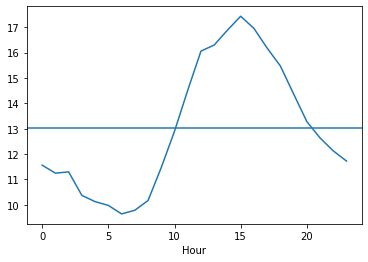

In [17]:
df.groupby('Hour')['Temperature(°C)'].mean().plot()
plt.axhline(df.groupby('Hour')['Temperature(°C)'].mean().mean())

In [18]:
df['Temperature(°C)']

744   -3.2
745    NaN
746   -3.7
747   -4.0
748    NaN
      ... 
739    0.0
740   -1.0
741   -1.6
742   -2.1
743   -2.6
Name: Temperature(°C), Length: 8760, dtype: float64

In [19]:
# 'Temperature(°C)' 열 결측치 시간대별 평균 기온으로 대체
df.loc[(df['Time'] == '새벽') & (df['Temperature(°C)'].isnull()), 'Temperature(°C)'] = 10.8
df.loc[(df['Time'] == '아침') & (df['Temperature(°C)'].isnull()), 'Temperature(°C)'] = 11.4
df.loc[(df['Time'] == '낮') & (df['Temperature(°C)'].isnull()), 'Temperature(°C)'] = 16.6
df.loc[(df['Time'] == '밤') & (df['Temperature(°C)'].isnull()), 'Temperature(°C)'] = 13.3

In [20]:
df[df['Temperature(°C)'].isna()]

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time


# Visibility (10m)
- Visibility (10m) 봄 : 봄에는 기온이 상승, 습도가 증가하는 경향이 있음. 이러한 경우에 안개가 발생할 가능성이 높아져 가시성이 감소
- Visibility (10m) 가을 : 가을에는 기온이 하강, 공기가 맑고 건조해져 안개가 적어지고 가시성이 증가

In [21]:
df['Visibility (10m)']

744    1358
745    2000
746    2000
747    2000
748    1994
       ... 
739    2000
740    2000
741    2000
742    2000
743    2000
Name: Visibility (10m), Length: 8760, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b74ec7d4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b74ec7dbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b74ec7d160>],
 'medians': [<matplotlib.lines.Line2D at 0x1b74ec872b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b74ec87610>],
 'means': []}

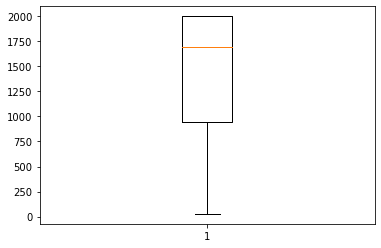

In [22]:
plt.boxplot(df['Visibility (10m)'])

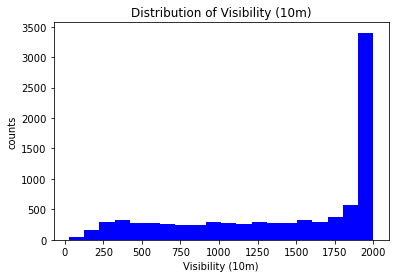

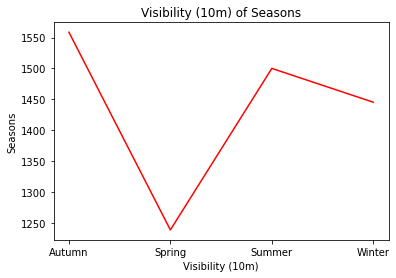

(array([315., 390., 443., 343., 178.,  61.,  28.,  12.,  10.,   9.]),
 array([   0. ,  248.1,  496.2,  744.3,  992.4, 1240.5, 1488.6, 1736.7,
        1984.8, 2232.9, 2481. ]),
 <BarContainer object of 10 artists>)

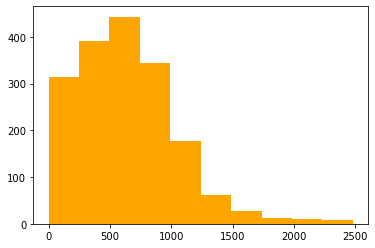

In [35]:
plt.hist(df['Visibility (10m)'], bins=20, color='blue')
plt.title('Distribution of Visibility (10m)')
plt.xlabel('Visibility (10m)')
plt.ylabel('counts')
plt.show()

plt.plot(df.groupby('Seasons')['Visibility (10m)'].mean(), color='red')
plt.title('Visibility (10m) of Seasons')
plt.xlabel('Visibility (10m)')
plt.ylabel('Seasons')
plt.show()

plt.hist(df.groupby('Visibility (10m)')['Rented Bike Count'].mean(),color='orange')

# Seasons
- 여름/겨울은 기온으로 어느정도 구분 가능하지만, 봄/가을은 기온만으로는 구분하기 어렵기 때문에 가시성 변수를 사용해 구분
## 결측치 개수 : 876개
### < Seasons 결측치 대체 방법 >
- 여름 : 기온이 20도 이상
- 겨울 : 기온이 5도 이하
- 봄 : 기온이 5~20도 이면서 가시성이 1300 이하
- 가을 : 기온이 5~20도 이면서 가시성이 1300 초과

In [36]:
#계절별 가시성
print(df.groupby('Seasons')['Visibility (10m)'].mean())

Seasons
Autumn    1558.495683
Spring    1239.359296
Summer    1500.113065
Winter    1445.534884
Name: Visibility (10m), dtype: float64


In [37]:
df[df['Seasons'].isna()]

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
749,749,01/01/2018,61,5,-4.4,54,0.8,1786,-12.3,0.00,0.0,0.0,NaN,Holiday,Yes,새벽
759,759,01/01/2018,344,15,3.0,27,2.9,1715,-14.2,0.78,0.0,0.0,NaN,Holiday,Yes,낮
760,760,01/01/2018,310,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,NaN,Holiday,Yes,낮
764,764,01/01/2018,206,20,-0.3,40,1.2,1936,-12.2,0.00,0.0,0.0,NaN,Holiday,Yes,밤
1490,1490,01/02/2018,103,2,-5.5,53,2.1,1980,-13.5,0.00,0.0,1.6,NaN,No Holiday,Yes,새벽
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,31/12/2017,22,5,-0.8,85,2.8,329,-3.0,0.00,0.0,1.2,NaN,Holiday,Yes,새벽
727,727,31/12/2017,39,7,-1.8,86,1.7,367,-3.8,0.00,0.0,1.2,NaN,Holiday,Yes,아침
738,738,31/12/2017,215,18,0.7,31,2.3,2000,-14.5,0.01,0.0,0.0,NaN,Holiday,Yes,밤
740,740,31/12/2017,161,20,-1.0,32,0.9,2000,-15.6,0.00,0.0,0.0,NaN,Holiday,Yes,밤


Seasons
Autumn    14.026003
Spring    13.073518
Summer    25.451256
Winter    -0.706305
Name: Temperature(°C), dtype: float64


<AxesSubplot:xlabel='Seasons'>

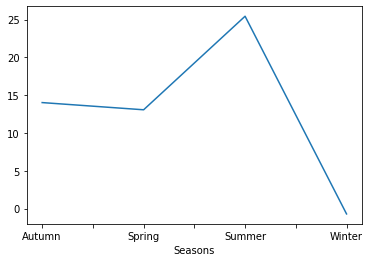

In [38]:
print(df.groupby('Seasons')['Temperature(°C)'].mean())
df.groupby('Seasons')['Temperature(°C)'].mean().plot()

In [40]:
# 'Seasons' 열 결측치 : 온도변수 가지고 여름,겨울 결정 / 가시성 변수 가지고 봄,여름 구분하기
df.loc[(df['Temperature(°C)'] <= 5 )& (df['Seasons'].isnull()), 'Seasons'] = 'Winter'
df.loc[(df['Temperature(°C)'] >= 20 )& (df['Seasons'].isnull()), 'Seasons'] = 'Summer'
df.loc[(5 <= df['Temperature(°C)']) & (df['Temperature(°C)'] <= 20) & (df['Visibility (10m)'] <= 1300) & (df['Seasons'].isnull()), 'Seasons'] = 'Spring'
df.loc[(5 <= df['Temperature(°C)']) & (df['Temperature(°C)'] <= 20) & (df['Visibility (10m)'] > 1300) & (df['Seasons'].isnull()), 'Seasons'] = 'Autumn'

In [41]:
df[df['Seasons'].isna()]

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time


# Wind speed (m/s)
## < Wind speed (m/s) 결측치 대체 방법 >
- 계절별 풍속 평균치로 대체

Seasons
Autumn    1.528930
Spring    1.825268
Summer    1.641214
Winter    1.919492
Name: Wind speed (m/s), dtype: float64


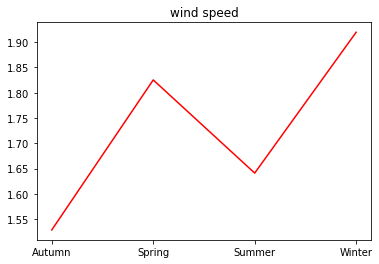

In [45]:
# 계절에 따른 풍속 시각화
print(df.groupby('Seasons')['Wind speed (m/s)'].mean())

plt.plot(df.groupby('Seasons')['Wind speed (m/s)'].mean(),color='red')
plt.title('wind speed')
plt.show()

<AxesSubplot:xlabel='Wind speed (m/s)'>

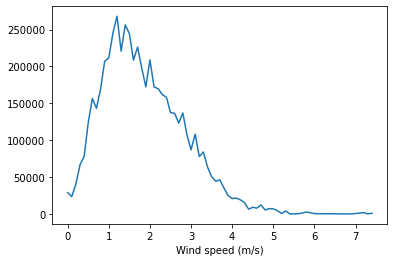

In [46]:
#풍속에 따른 따릉이 대여량
df.groupby('Wind speed (m/s)')['Rented Bike Count'].sum().plot()

In [47]:
df[df['Wind speed (m/s)'].isna()]

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
745,745,01/01/2018,230,1,10.8,41,NaN,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes,새벽
755,755,01/01/2018,169,11,0.1,27,NaN,1874,-16.7,0.84,0.0,0.0,Winter,Holiday,Yes,아침
757,757,01/01/2018,248,13,2.4,22,NaN,1921,-17.2,1.10,0.0,0.0,Winter,Holiday,Yes,낮
766,766,01/01/2018,168,22,-1.3,48,NaN,1927,-10.9,0.00,0.0,0.0,Winter,Holiday,Yes,밤
1489,1489,01/02/2018,149,1,-5.4,54,NaN,1996,-13.2,0.00,0.0,1.6,Winter,No Holiday,Yes,새벽
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,8031,31/10/2018,994,15,16.6,35,NaN,1908,-3.0,1.72,0.0,0.0,Autumn,No Holiday,Yes,낮
8032,8032,31/10/2018,1185,16,11.8,34,NaN,1979,-3.5,1.16,0.0,0.0,Autumn,No Holiday,Yes,낮
8034,8034,31/10/2018,2094,18,13.3,48,NaN,2000,-1.0,0.03,0.0,0.0,Autumn,No Holiday,Yes,밤
8035,8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.00,0.0,0.0,Autumn,No Holiday,Yes,밤


In [48]:
# 'Wind speed (m/s)' 결측치 계절별 평균 풍속으로 대체
Seasons
Autumn    1.528930
Spring    1.825268
Summer    1.641214
Winter    1.919492

df.loc[(df['Seasons'] == 'Spring') & (df['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.9
df.loc[(df['Seasons'] == 'Summer') & (df['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.6
df.loc[(df['Seasons'] == 'Autumn') & (df['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.5
df.loc[(df['Seasons'] == 'Winter') & (df['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.9

In [49]:
df[df['Wind speed (m/s)'].isna()]

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time
